In [34]:
# 1.导入数据库和准备数据
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline

# 读取数据
file = r'data_set/winequality-red.csv'
wine = pd.read_csv(file)

# 检查列/变量数据
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


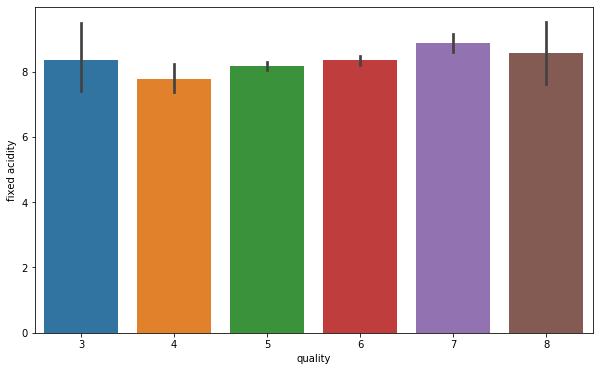

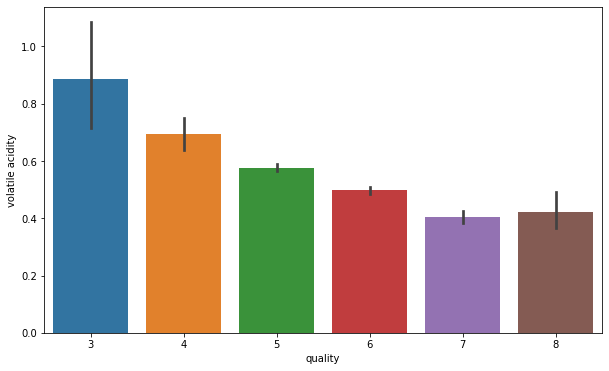

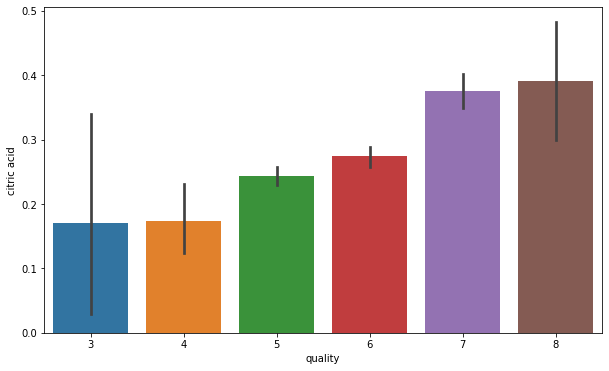

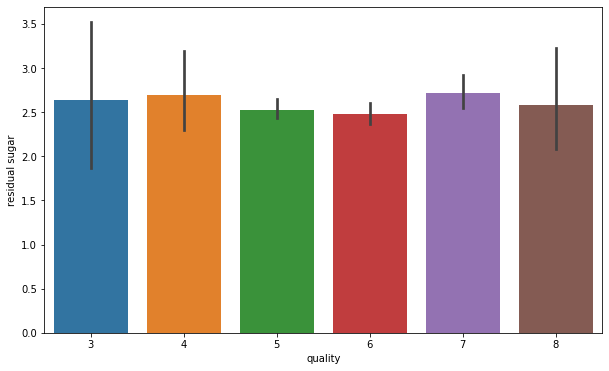

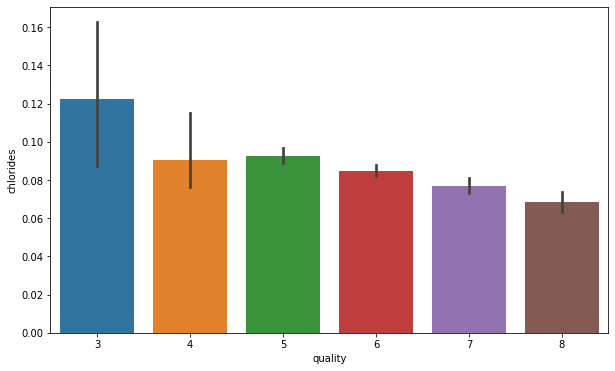

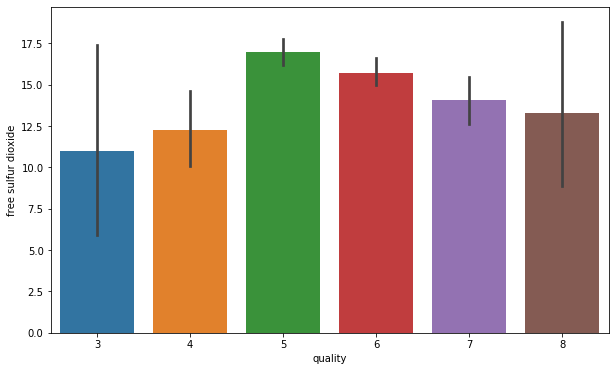

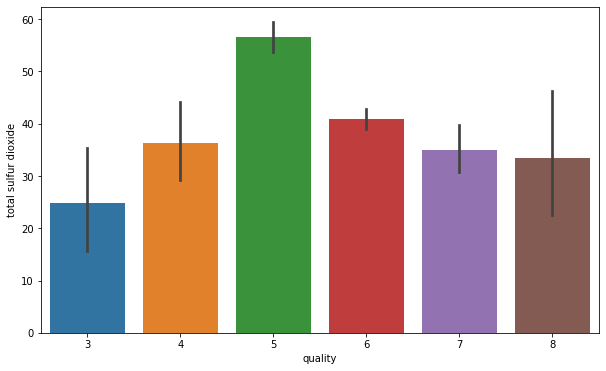

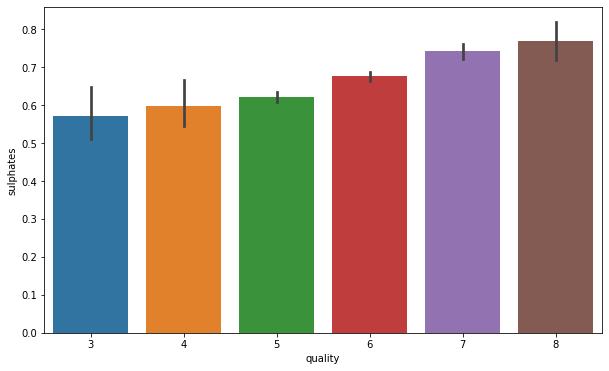

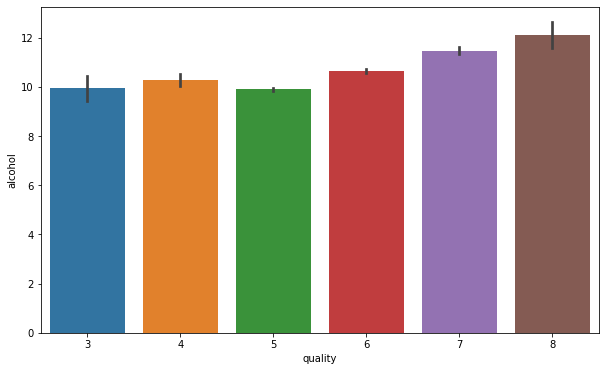

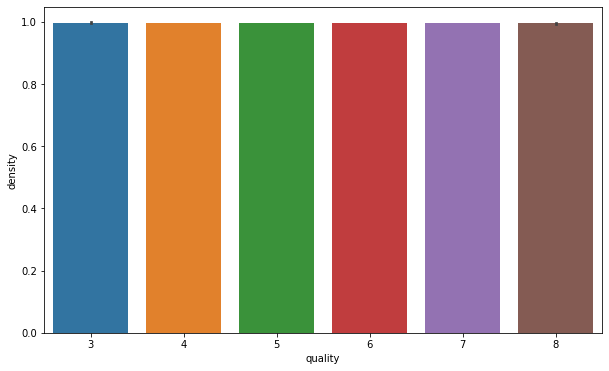

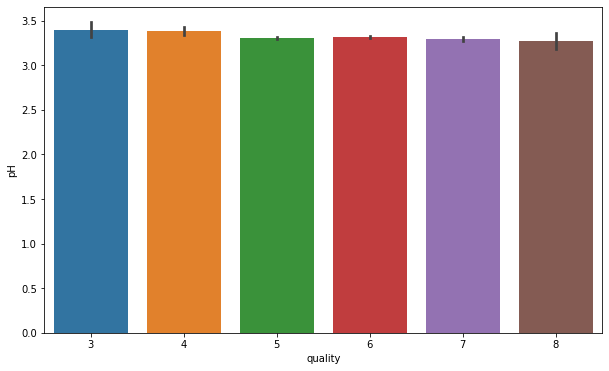

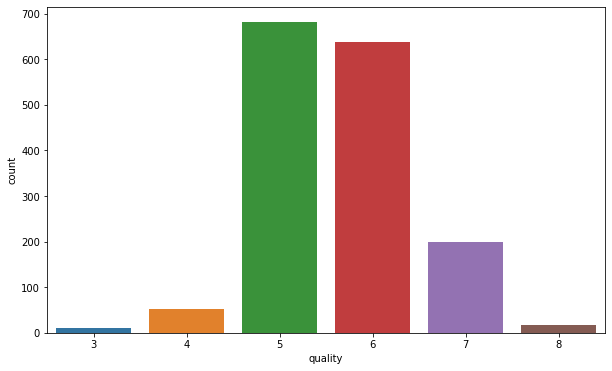

In [35]:
# 关于相关变量的补充解释说明
# fixed acidity：非挥发性酸
# volatile acidity:挥发性酸，醋酸，浓度过高会导致酒过酸
# citric acid：柠檬酸，含量较少，可以为红酒增加新鲜的口感和特别风味
# residual sugar：残余糖，未被转化为酒精的剩余果糖，过高的残糖含量会让酒偏甜
# chlorides：氯化物
# free sulfur dioxide：自由二氧化硫，可以阻止微生物生长和酒的氧化
# total sulfur dioxide：完全二氧化硫，一般含量极少，难以被味觉发现
# density：红酒中水的浓度（与酒精浓度和糖的浓度有关）
# PH：用于描述酒的酸度（从0到14,0是最酸），一般是3-4的PH值
# sulphates：硫酸盐，一种酒的添加剂，可以导致二氧化硫的增加，是一种抗氧化剂和抗菌剂
# alcohol：酒精浓度
# quality：output variable，是品酒家对各种红酒的打分，从0-10分，分数越高代表评价越好

# 2.数据可视化
# 我们使用seaborn这个library中的柱状图功能进行绘制
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='fixed acidity', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='volatile acidity', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='citric acid', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='residual sugar', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='chlorides', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='sulphates', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='alcohol', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='density', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='pH', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine)

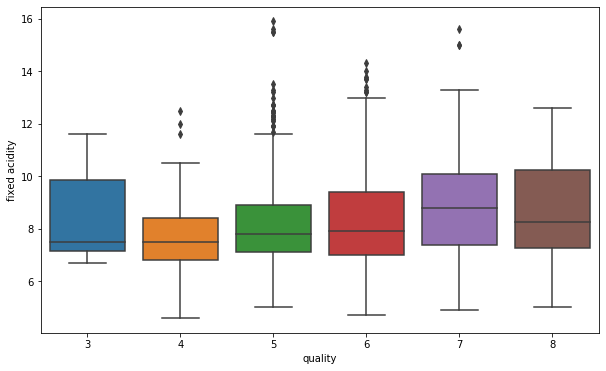

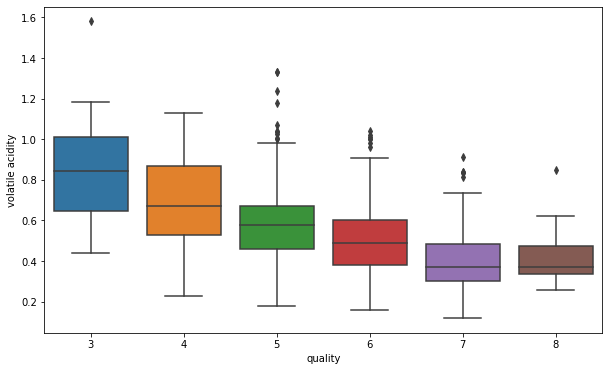

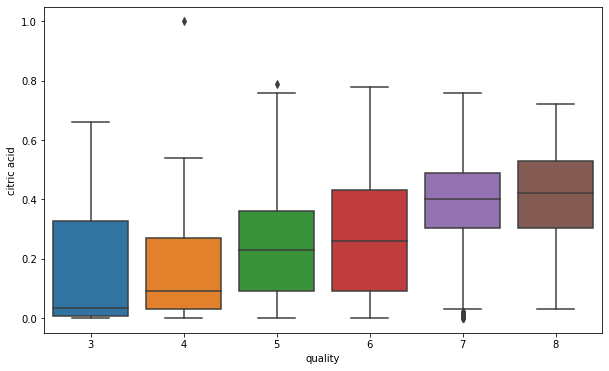

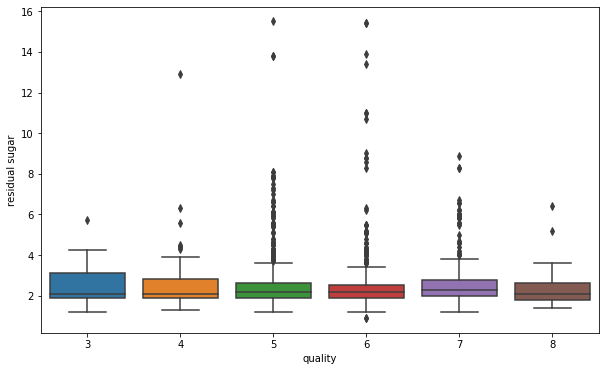

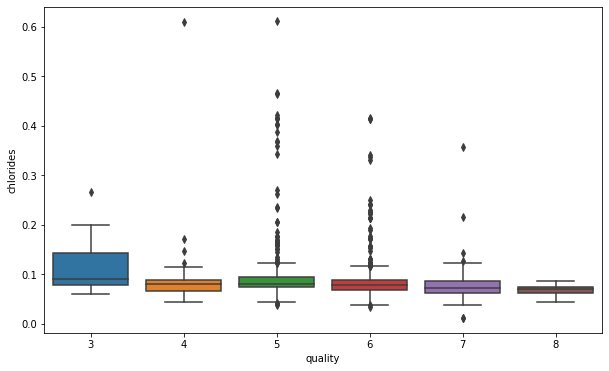

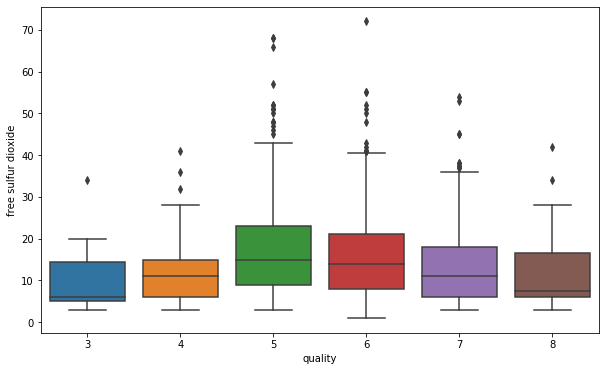

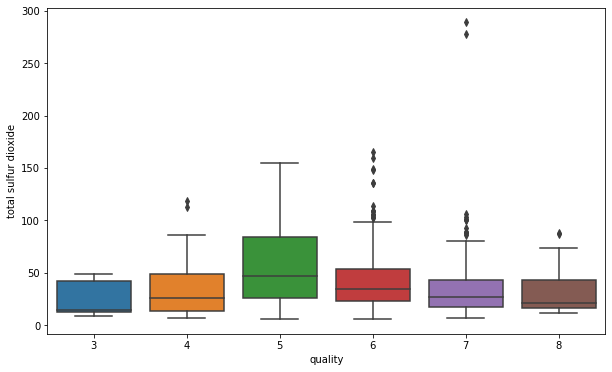

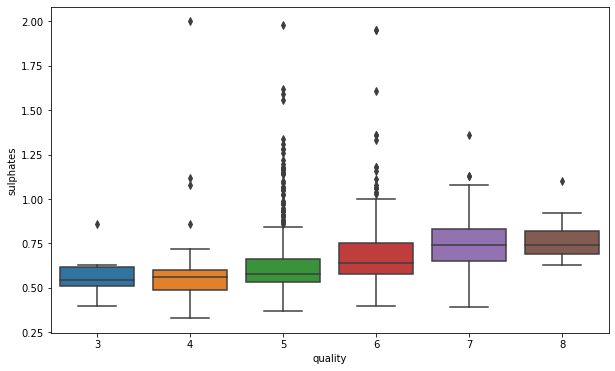

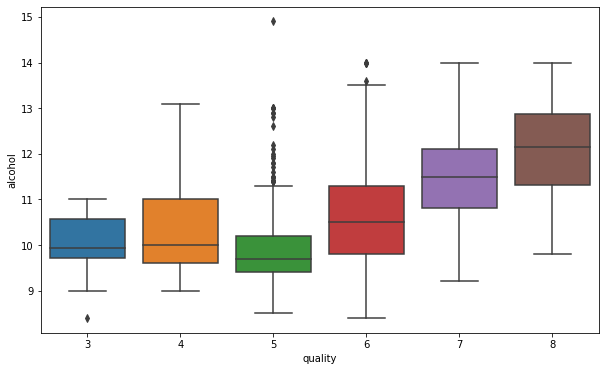

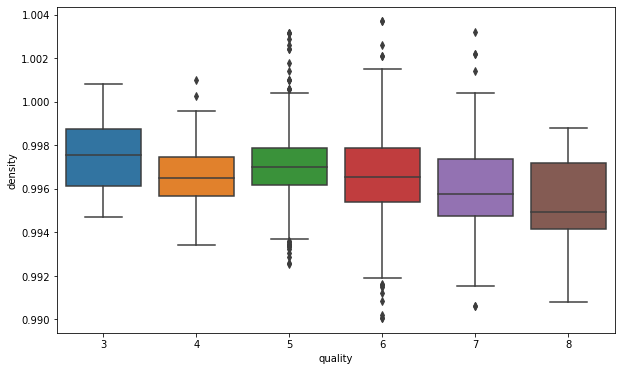

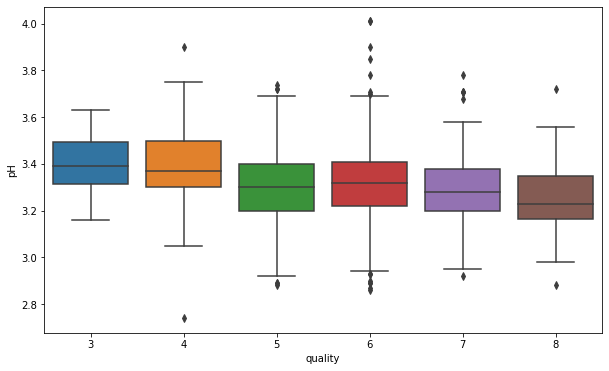

In [36]:
# 2.13 绘制箱线图，检查异常点/outliers
# 因为目标变量是“quality”，所以我们使用箱线图（boxplot）绘制每个指标对质量评分的图形
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='fixed acidity', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='citric acid', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='residual sugar', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='chlorides', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='free sulfur dioxide', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='total sulfur dioxide', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='sulphates', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='density', data=wine)

fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='pH', data=wine)

In [37]:
# 通过箱线图结果，可以发现，在一些列有很多的异常点或者不符合正态分布，我们可以结合使用describe函数，来进一步了解分布情况
# 检查数据分布
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [38]:
# 3.数据预处理
# 3.1结果数据分类
# 将原数据中，结果变量'quality'转化为二分类（binary classificaion）
# 也就是说，把红酒的品质划分，从原来的1-10评分，转换为好与坏两种
# 通过可视化检查，我们发现'quality'评分，主要集中在6分及以下；我们决定将6.5分作为划分好坏的标准；
# 即6.5分及以上为好（1），6.5分以下为坏（0）
wine['reviews'] = wine['quality'].apply(lambda x: 1 if x > 6.5 else 0)

# 让我们检查划分的结果
wine['reviews'].value_counts()

0    1382
1     217
Name: reviews, dtype: int64

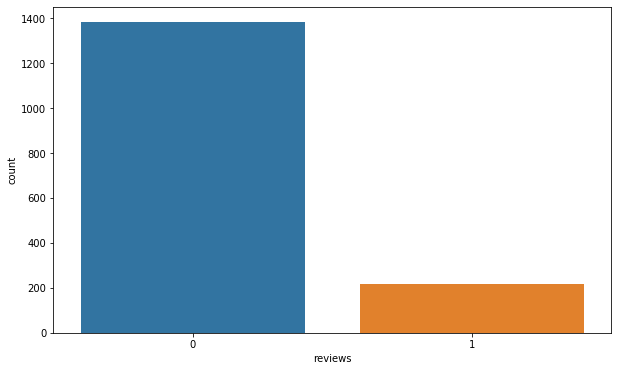

In [39]:
# 划分结果可视化处理
fig = plt.figure(figsize=(10, 6))
sns.countplot(x='reviews', data=wine)

In [40]:
# 3.2 分离特征变量和结果变量
# 我们将原数据wine中的特征变量和结果变量分离
# 也就是把'reviews'和'quality'从原dataframe中拿掉
# 这里我们可以使用切片来处理
# 注意，这里我们使用的是列的数字索引，所以是iloc；如果是列名称，例如"reviews"，则使用的函数就是loc了
X = wine.iloc[:, :11]
y = wine['reviews']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
dtypes: float64(11)
memory usage: 137.5 KB


In [41]:
# 3.3 standard scaling
# 在之前，我们已经发现了原始数据有有一定的问题，例如不同数据维度之间的量纲不同（比如有的数据是在0-1之间，有的是在3-8之间），并且有的数据并不符合正态分布
# 我们在这里对数据，进行线性归一化处理（standard scaling）处理
# 也称min-max标准化、离差标准化；是对原始数据的线性变换，使得结果值映射到[0,1]之间。
# 转换函数如下：
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

# 这里的fit_transform()函数：
# fit()就是计算标准化所用到的均值与方差；
# 而transform（）函数则是利用fit（）的结果作为参数对数据进行相应的处理，比如正规化
# fit_transform()就是先调用fit()，后调用transform（）

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [42]:
# 3.4 随机划分训练集和测试集
# train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取traindata和testdata
# 语法为：
# X_train,X_test, y_train, y_test =
# cross_validation.train_test_split(train_data,train_target,test_size=0.4, random_state=0)
# 参数解释：train_data：所要划分的样本特征集
# train_target：所要划分的样本结果
# test_size：样本占比，如果是整数的话就是样本的数量
# random_state：是随机数的种子。
# 随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。
# 但填0或不填，每次都会不一样。
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=2020)

In [43]:
# 4.预测模型
# 4.1 linear regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print('accuracy score={}'.format(lr_acc_score * 100))
print(classification_report(y_test, lr_predict))

[[269   9]
 [ 30  12]]
accuracy score=87.8125
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       278
           1       0.57      0.29      0.38        42

    accuracy                           0.88       320
   macro avg       0.74      0.63      0.66       320
weighted avg       0.86      0.88      0.86       320



In [44]:
# 4.2 决策树模型
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)

dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print('accuracy score={}'.format(dt_acc_score * 100))
print(classification_report(y_test, dt_predict))

[[250  28]
 [ 12  30]]
accuracy score=87.5
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       278
           1       0.52      0.71      0.60        42

    accuracy                           0.88       320
   macro avg       0.74      0.81      0.76       320
weighted avg       0.90      0.88      0.88       320



In [45]:
# 4.3 Random Forest Classifier随机森林算法
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)

rfc_conf_matrix = confusion_matrix(y_test, rfc_predict)
rfc_acc_score = accuracy_score(y_test, rfc_predict)
print(rfc_conf_matrix)
print('accuracy score={}'.format(rfc_acc_score * 100))
print(classification_report(y_test, rfc_predict))

[[270   8]
 [ 22  20]]
accuracy score=90.625
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       278
           1       0.71      0.48      0.57        42

    accuracy                           0.91       320
   macro avg       0.82      0.72      0.76       320
weighted avg       0.90      0.91      0.90       320



In [46]:
svc = SVC()
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)

svc_conf_matrix = confusion_matrix(y_test, svc_predict)
svc_acc_score = accuracy_score(y_test, svc_predict)
print(svc_conf_matrix)
print('accuracy score={}'.format(svc_acc_score * 100))
print(classification_report(y_test, svc_predict))

[[275   3]
 [ 32  10]]
accuracy score=89.0625
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       278
           1       0.77      0.24      0.36        42

    accuracy                           0.89       320
   macro avg       0.83      0.61      0.65       320
weighted avg       0.88      0.89      0.86       320



In [47]:
# 5.尝试对SVC模型的参数，进行优化
param = {
    'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)
# 得到对于svc模型的最佳参数
print(grid_svc.best_params_)

{'C': 1.3, 'gamma': 0.7, 'kernel': 'rbf'}


In [48]:
svc2 = SVC(C=1.3, kernel='rbf', gamma=0.7)
svc2.fit(X_train, y_train)
svc2_predict = svc2.predict(X_test)

svc2_conf_matrix = confusion_matrix(y_test, svc2_predict)
svc2_acc_score = accuracy_score(y_test, svc2_predict)
print(svc2_conf_matrix)
print('accuracy score={}'.format(svc2_acc_score * 100))
print(classification_report(y_test, svc2_predict))
# 可以看到，我们成功提升了准确度

[[273   5]
 [ 23  19]]
accuracy score=91.25
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       278
           1       0.79      0.45      0.58        42

    accuracy                           0.91       320
   macro avg       0.86      0.72      0.76       320
weighted avg       0.91      0.91      0.90       320

